# Manipulation avec Pandas

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
customers=pd.read_csv("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
products=pd.read_csv("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [4]:
transactions=pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [5]:
data_inter=customers.merge(transactions)
data_inter

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715
...,...,...,...,...,...,...
337011,c_84,f,1982,1_459,2022-02-17 00:16:56.629536,s_166337
337012,c_84,f,1982,0_1050,2021-09-20 10:05:37.086910,s_92701
337013,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960
337014,c_84,f,1982,1_343,2021-04-13 03:59:33.614841,s_19845


In [6]:
data = data_inter.merge(products)
data['age'] = 2022 - data.birth
data

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40
...,...,...,...,...,...,...,...,...,...
336908,c_7135,m,1996,2_99,2021-07-11 20:56:49.820935,s_61009,84.99,2,26
336909,c_5828,f,1998,2_99,2021-11-21 01:53:46.967570,s_122697,84.99,2,24
336910,c_8260,m,1991,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0,31
336911,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,38


In [7]:
data = data.drop(data[data.price < 0].index)
data

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40
...,...,...,...,...,...,...,...,...,...
336908,c_7135,m,1996,2_99,2021-07-11 20:56:49.820935,s_61009,84.99,2,26
336909,c_5828,f,1998,2_99,2021-11-21 01:53:46.967570,s_122697,84.99,2,24
336910,c_8260,m,1991,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0,31
336911,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,38


## Travail à faire

### Créer le dataset par client

| id_client | Age | Sexe | *Montant | *Fréquence | *Panier Moyen | *Tranche d'Age | *Montant catégorie 0 | *Montant catég 1 | *Montant catég 2 | *Récence |
|:---------:|-----|------|----------|------------|---------------|----------------|----------------------|------------------|------------------|---------|
|           |     |      |          |            |               |                |                      |                  |                  |         |
|           |     |      |          |            |               |                |                      |                  |                  |         |

Les colonnes précédées d'un "*" sont les nouvelles colonnes à calculer.  
Montant : montant dépensé total des achats sur la période  
Fréquence : nombre d'achat sur la période
Récence : nombre de jour depuis le dernier achat (Attention, partir du max(Date) du dataset !)
  
Vous devez avoir à la fin, une ligne par client.  

**Fonctions nécessaires :**  
 - [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
 - [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) (+ reset_index() )
 

In [44]:
clientid = data.groupby(['client_id', 'sex', 'age']).sum().reset_index()
clientid = clientid.drop(['birth','price','categ','recence'], axis = 1)
clientid

,client_id,sex,age
0,c_1,m,67
1,c_10,m,66
2,c_100,m,30
3,c_1000,f,56
4,c_1001,m,40
...,...,...,...
8595,c_995,m,67
8596,c_996,f,52
8597,c_997,f,28
8598,c_998,m,21


In [47]:
montant = data.groupby('client_id')[['price']].sum()
montant.columns = ['Montant']
montant = montant.reset_index()
montant

,client_id,Montant
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8595,c_995,119.08
8596,c_996,739.60
8597,c_997,572.89
8598,c_998,1527.69


In [46]:
f=data.groupby(['client_id']).count()
frequence=f['price']
frequence

client_id
c_1       20
c_10      28
c_100      6
c_1000    56
c_1001    58
          ..
c_995      8
c_996     42
c_997     23
c_998     28
c_999     22
Name: price, Length: 8600, dtype: int64

In [10]:

categ= pd.pivot_table(data, index=["client_id"] ,values = ['price'], columns= ["categ"],aggfunc=sum, fill_value=0)
categ


price                 
categ           0       1        2
client_id                         
c_1        174.20   71.58    54.87
c_10       124.92  391.27    69.99
c_100       31.38   52.96   138.53
c_1000     169.85  810.17     0.00
c_1001     527.81  274.64   300.00
...           ...     ...      ...
c_995       55.34   63.74     0.00
c_996      204.70  534.90     0.00
c_997       84.86  158.92   329.11
c_998       88.17  108.06  1331.46
c_999       92.65  212.35     0.00

[8600 rows x 3 columns]

In [50]:
age = data.groupby('client_id')['age'].mean()
agegroupe = pd.cut(x=age, bins=[1,10,20,30,40,50,60,70,80,90,100])
agegroupe = pd.DataFrame(agegroupe)
agegroupe.columns = ['Tranche-d_age']
agegroupe.reset_index()

,client_id,Tranche-d_age
0,c_1,"(60, 70]"
1,c_10,"(60, 70]"
2,c_100,"(20, 30]"
3,c_1000,"(50, 60]"
4,c_1001,"(30, 40]"
...,...,...
8595,c_995,"(60, 70]"
8596,c_996,"(50, 60]"
8597,c_997,"(20, 30]"
8598,c_998,"(20, 30]"


In [104]:
count_session_unique = data.groupby('client_id')[['session_id']].nunique().reset_index()
count_session_unique
prix_moyen=data.groupby('client_id')[['price']].sum().reset_index()
prix_moyen["prix_moyen"]=prix_moyen['price']/count_session_unique['session_id']

prix_moyen


,client_id,price,prix_moyen
0,c_1,300.65,20.043333
1,c_10,586.18,36.636250
2,c_100,222.87,74.290000
3,c_1000,980.02,23.333810
4,c_1001,1102.45,45.935417
...,...,...,...
8595,c_995,119.08,23.816000
8596,c_996,739.60,20.544444
8597,c_997,572.89,57.289000
8598,c_998,1527.69,117.514615


In [100]:

categ = pd.pivot_table(data, index=['client_id'], values = ['price'],columns=['categ'],  aggfunc=sum, fill_value=0)
categ

price                 
categ           0       1        2
client_id                         
c_1        174.20   71.58    54.87
c_10       124.92  391.27    69.99
c_100       31.38   52.96   138.53
c_1000     169.85  810.17     0.00
c_1001     527.81  274.64   300.00
...           ...     ...      ...
c_995       55.34   63.74     0.00
c_996      204.70  534.90     0.00
c_997       84.86  158.92   329.11
c_998       88.17  108.06  1331.46
c_999       92.65  212.35     0.00

[8600 rows x 3 columns]

In [19]:
categ = pd.pivot_table(data, index=['client_id'], values = ['price'],columns=['categ'],  aggfunc=sum, fill_value=0)
categ.columns = ['montant_categ_O','montant_categ_1','montant_categ_2']
categ = categ.reset_index()
categ

,client_id,montant_categ_O,montant_categ_1,montant_categ_2
0,c_1,174.20,71.58,54.87
1,c_10,124.92,391.27,69.99
2,c_100,31.38,52.96,138.53
3,c_1000,169.85,810.17,0.00
4,c_1001,527.81,274.64,300.00
...,...,...,...,...
8595,c_995,55.34,63.74,0.00
8596,c_996,204.70,534.90,0.00
8597,c_997,84.86,158.92,329.11
8598,c_998,88.17,108.06,1331.46


Ceci peut vous aider :

In [18]:
from datetime import datetime
data['date'] = data['date'].apply(pd.to_datetime)

In [20]:
date_format = "%m/%d/%Y"
a = data['date']
b = max(data['date'])
data['recence'] = b-a
data['recence'] = data['recence'].astype('timedelta64[D]')
recence = data.groupby('client_id')['recence'].mean()
recence = pd.DataFrame(recence).reset_index()
recence

,client_id,recence
0,c_1,141.800000
1,c_10,204.785714
2,c_100,236.333333
3,c_1000,163.553571
4,c_1001,149.586207
...,...,...
8595,c_995,237.250000
8596,c_996,208.690476
8597,c_997,163.086957
8598,c_998,171.214286


,client_id,sex,age
0,c_1,m,67
1,c_10,m,66
2,c_100,m,30
3,c_1000,f,56
4,c_1001,m,40
...,...,...,...
8595,c_995,m,67
8596,c_996,f,52
8597,c_997,f,28
8598,c_998,m,21


In [97]:
Data_client_id = clientid.merge(montant,on='client_id',how ='left')
Data_client_id = Data_client_id.merge(frequence,on='client_id',how ='left')
Data_client_id = Data_client_id.merge(prix_moyen,on='client_id',how ='left')
Data_client_id = Data_client_id.merge(agegroupe,on='client_id',how ='left')
Data_client_id = Data_client_id.merge(categ,on='client_id',how ='left')
Data_client_id = Data_client_id.merge(recence,on='client_id',how ='left')

Data_client_id

,client_id,sex,age,Montant,price_x,price_y,prix_moyen,Tranche-d_age,montant_categ_O,montant_categ_1,montant_categ_2,recence
0,c_1,m,67,300.65,20,300.65,20.043333,"(60, 70]",174.20,71.58,54.87,141.800000
1,c_10,m,66,586.18,28,586.18,36.636250,"(60, 70]",124.92,391.27,69.99,204.785714
2,c_100,m,30,222.87,6,222.87,74.290000,"(20, 30]",31.38,52.96,138.53,236.333333
3,c_1000,f,56,980.02,56,980.02,23.333810,"(50, 60]",169.85,810.17,0.00,163.553571
4,c_1001,m,40,1102.45,58,1102.45,45.935417,"(30, 40]",527.81,274.64,300.00,149.586207
...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,m,67,119.08,8,119.08,23.816000,"(60, 70]",55.34,63.74,0.00,237.250000
8596,c_996,f,52,739.60,42,739.60,20.544444,"(50, 60]",204.70,534.90,0.00,208.690476
8597,c_997,f,28,572.89,23,572.89,57.289000,"(20, 30]",84.86,158.92,329.11,163.086957
8598,c_998,m,21,1527.69,28,1527.69,117.514615,"(20, 30]",88.17,108.06,1331.46,171.214286


In [160]:
data_final = pd.read_csv("C:/Users/User/Downloads/dataset_Librairie _final/dataset_manipulation_librairie.csv")
dataset_final

,client_id,age,sex,montant,frequence,panier_moyen,tranche_age,montant_categ_0,montant_categ_1,montant_categ_2,recence
0,c_1,67,m,300.65,15,20.043333,"(50, 100]",174.20,71.58,54.87,27.0
1,c_10,66,m,586.18,16,36.636250,"(50, 100]",124.92,391.27,69.99,76.0
2,c_100,30,m,222.87,3,74.290000,"(25, 35]",31.38,52.96,138.53,202.0
3,c_1000,56,f,980.02,42,23.333810,"(50, 100]",169.85,810.17,0.00,0.0
4,c_1001,40,m,1102.45,24,45.935417,"(35, 50]",527.81,274.64,300.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,67,m,119.08,5,23.816000,"(50, 100]",55.34,63.74,0.00,116.0
8596,c_996,52,f,739.60,36,20.544444,"(50, 100]",204.70,534.90,0.00,22.0
8597,c_997,28,f,572.89,10,57.289000,"(25, 35]",84.86,158.92,329.11,54.0
8598,c_998,21,m,1527.69,13,117.514615,"(18, 25]",88.17,108.06,1331.46,5.0


### Centrer/Réduire les données

Petite veille sur le sujet avant de se lancer : https://mrmint.fr/data-preprocessing-feature-scaling-python   
Mais n'oubliez pas de faire aussi vos propres recherches.

Créer le dataset avec les données centrées et réduites.

In [161]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm


C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

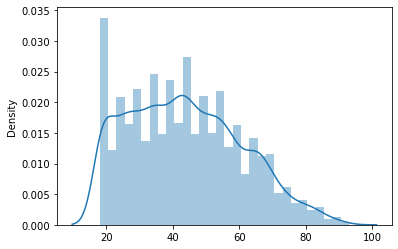

In [162]:
a=pd.DataFrame(dataset_final['age'])
a
sns.distplot(a)

In [124]:
#Z-Score standardisation
from sklearn.preprocessing import StandardScaler
df_std = dataset_final.copy()
#ICI LE NOM DE TES COLONNES
num_columns = ['age', 'recence', 'montant_categ_0', 'montant_categ_1','montant_categ_2', 'montant', 'panier_moyen', 'frequence']
#fit, on lui donne les données pour l'entraînement
std_scaler = StandardScaler().fit(dataset_final[num_columns])

#transform, il va appliquer le modèle sur les données
df_std[num_columns] = std_scaler.transform(dataset_final[num_columns])
df_std

,client_id,age,sex,montant,frequence,panier_moyen,tranche_age,montant_categ_0,montant_categ_1,montant_categ_2,recence
0,c_1,1.375740,m,-0.145524,-0.065034,-0.886085,"(50, 100]",-0.067417,-0.224196,-0.071303,-0.102653
1,c_10,1.316596,m,-0.034237,-0.051112,-0.153254,"(50, 100]",-0.106470,0.153541,-0.060364,0.983415
2,c_100,-0.812603,m,-0.175839,-0.232100,1.509736,"(25, 35]",-0.180599,-0.246197,-0.010777,3.776163
3,c_1000,0.725152,f,0.119265,0.310864,-0.740760,"(50, 100]",-0.070864,0.648503,-0.110999,-0.701099
4,c_1001,-0.221159,m,0.166983,0.060265,0.257447,"(35, 50]",0.212814,0.015734,0.106041,-0.656770
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,1.375740,m,-0.216292,-0.204256,-0.719464,"(50, 100]",-0.161611,-0.233460,-0.110999,1.870002
8596,c_996,0.488574,f,0.025560,0.227331,-0.863953,"(50, 100]",-0.043246,0.323251,-0.110999,-0.213477
8597,c_997,-0.930892,f,-0.039416,-0.134645,0.758881,"(25, 35]",-0.138217,-0.120998,0.127101,0.495793
8598,c_998,-1.344902,m,0.332724,-0.092879,3.418764,"(18, 25]",-0.135594,-0.181093,0.852269,-0.590276


### Matrice de corrélation

<AxesSubplot:>

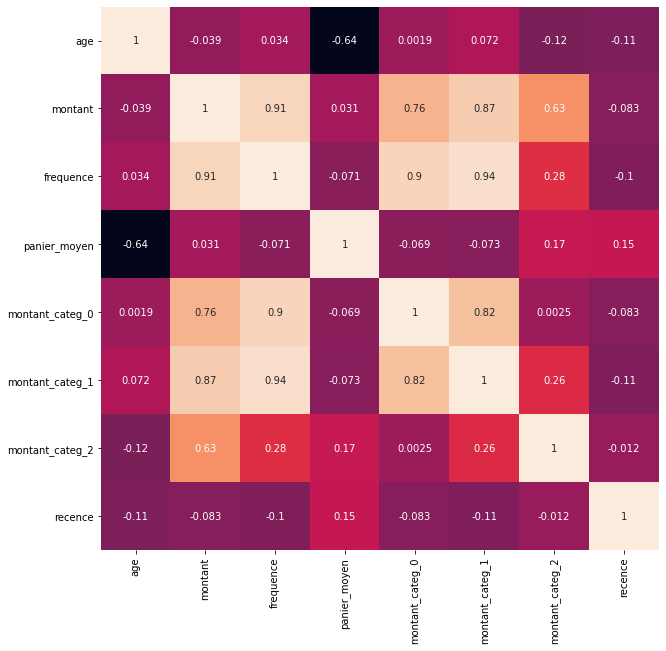

In [125]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,10))
sns.heatmap(df_std.corr(),annot= True, cbar = False)

Comment sont calculés les coefficients ? Par quelle méthode ? Qu'est-ce que signifie une corrélation positive/négative ? 

Pour vous aiguillez avec Python : https://www.delftstack.com/fr/howto/python-pandas/pandas-correlation-matrix/

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

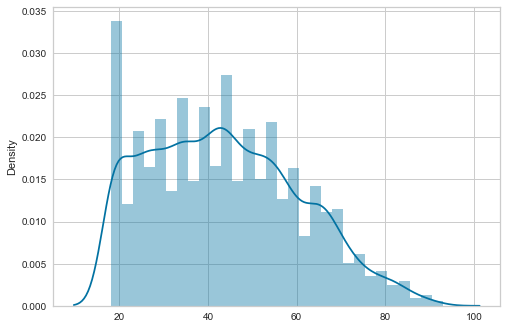

In [265]:
#sns.distplot(Data_client_id['age'],kde=True)
a=pd.DataFrame(dataset_final['age'])
a
sns.distplot(a)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

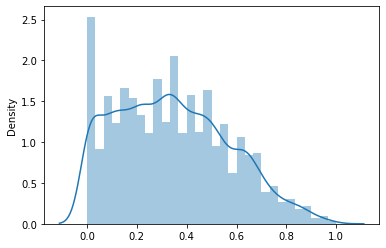

In [150]:
a=pd.DataFrame(df_std['age'])
sns.distplot(a)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

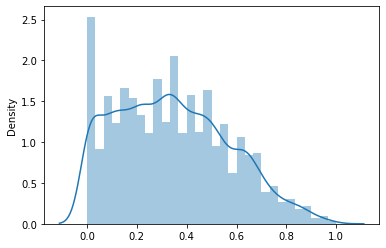

In [146]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler().fit(dataset_final[num_columns])
df_std[num_columns] = std_scaler.transform(dataset_final[num_columns])
a=pd.DataFrame(df_std['age'])
sns.distplot(a)




In [ ]:
#reduire le dataset
#dataset_final= dataset_final.drop(['birth','price','categ','recence'], axis = 1)

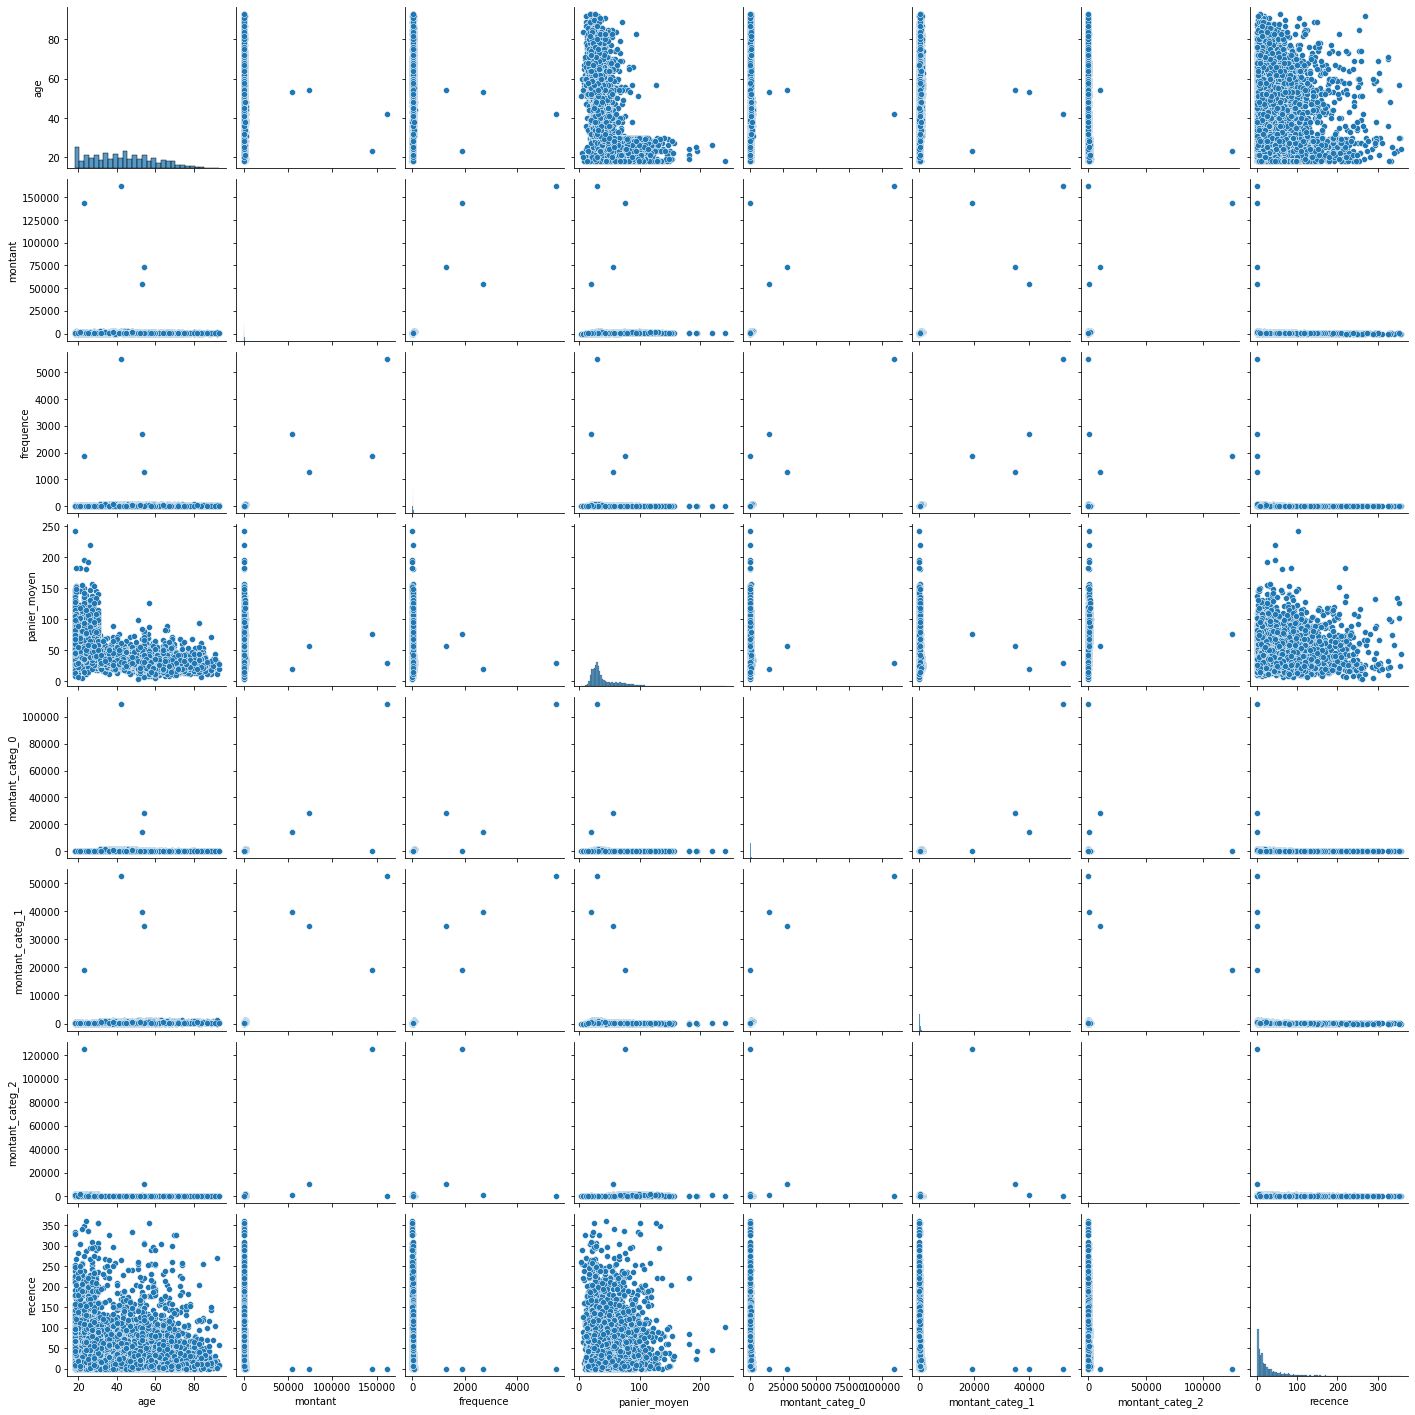

In [170]:
sns.pairplot(dataset_final)


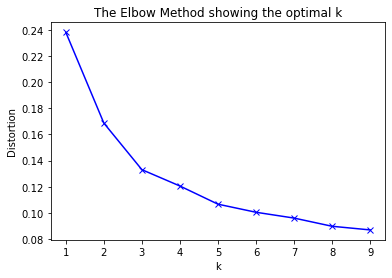

In [201]:
data= df_std.drop(['client_id','sex','tranche_age','frequence'], axis = 1)
# clustering dataset
# determine k using elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [226]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
data_scaled= normalize(data)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled

,age,montant,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence,identi_cluster
0,0.161147,0.000451,0.016540,0.000392,0.000338,0.000108,0.018551,0.986617
1,0.157685,0.000885,0.033771,0.000281,0.001843,0.000138,0.052159,0.985530
2,0.031728,0.000268,0.058685,0.000057,0.000201,0.000219,0.111580,0.991514
3,0.125636,0.001494,0.020071,0.000384,0.003841,0.000000,0.000000,0.991865
4,0.277514,0.006414,0.166794,0.004554,0.004967,0.002267,0.005271,0.946069
...,...,...,...,...,...,...,...,...
8595,0.129283,0.000140,0.016419,0.000100,0.000241,0.000000,0.063939,0.989408
8596,0.979554,0.009809,0.149465,0.004034,0.022096,0.000000,0.132416,0.000000
8597,0.026618,0.000701,0.044760,0.000154,0.000607,0.000525,0.030029,0.998191
8598,0.019447,0.004572,0.232542,0.000391,0.001004,0.005170,0.006771,0.972343


In [266]:
kmeanModel.inertia_

760.6911952182603

In [247]:
! pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [249]:
! pip install --user yellowbrick

In [252]:
from sklearn.metrics import silhouette_score
kmeanModel = KMeans(n_clusters=6).fit(data_scaled)
dataset_final['cluster']=kmeanModel.fit_predict(data_scaled)
score = silhouette_score(data_scaled, kmeanModel.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.861


In [253]:
from yellowbrick.cluster import SilhouetteVisualizer

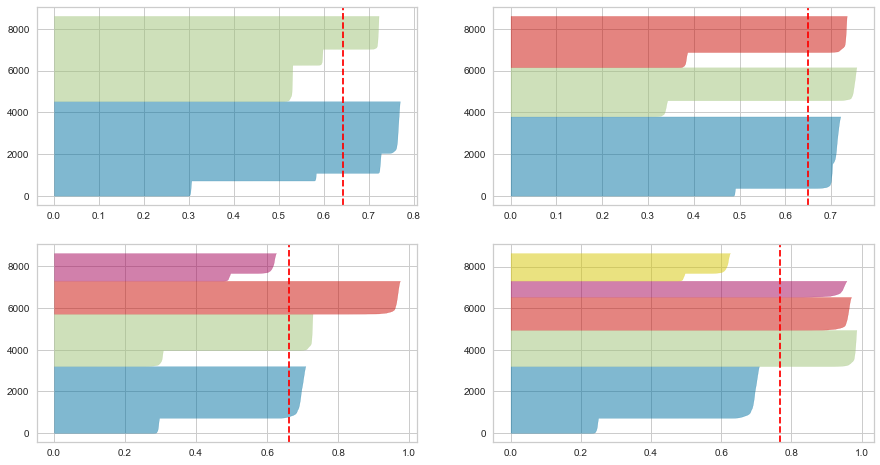

In [279]:
#L’affichage  de silhouette pour différentes valeurs de K={2,3,4,5}
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q,mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)